In [2]:
from dwave.system import EmbeddingComposite, DWaveSampler,DWaveCliqueSampler
from dwave.system.composites import LazyFixedEmbeddingComposite
from dwave.system.composites import FixedEmbeddingComposite
from minorminer import find_embedding
import dimod
import numpy as np
import os
import time
import math
import requests
import json
import datetime 
import scipy.io
from sympy import *
import dimod
import pickle
from dwave.system.composites import LazyFixedEmbeddingComposite
from dwave.system.composites import FixedEmbeddingComposite
from minorminer import find_embedding

In [4]:
H=scipy.io.loadmat("channel(9x9QAM)")
H=H['h']
Y=scipy.io.loadmat("Y(9x9QAM)")
Y=Y['Y']
c=scipy.io.loadmat("count(9x9QAM)")
c=c['k'][0]
M=scipy.io.loadmat("msg(9x9QAM)")
M=M['m']
N=len(H[0])

#BER=scipy.io.loadmat("BER(QAM)")

In [5]:
HI=np.zeros((N,N))
HQ=np.zeros((N,N))
YI=np.zeros((N,1))
YQ=np.zeros((N,1))

In [6]:
print(N)

9


In [4]:
def Opt(H,Y):
    H=Matrix(H)
    Y=Matrix(Y)
    Y=Y.reshape(2,1)
    H=H.reshape(2,2)
    q1,q2,q3,q4,q5,q6,q7,q8=symbols(('q1 q2 q3 q4 q5 q6 q7 q8 '),real=True)
    v1=(4*q1+2*q2-3)+I*(4*q3+2*q4-3)
    v2=(4*q5+2*q6-3)+I*(4*q7+2*q8-3)

    v=Matrix([[v1],[v2]])
    t=Y-H*v
    t=t=re(Abs(t.transpose())*Abs(t))
    t=t-t.subs({q1:0,q2:0, q3: 0,q4:0,q5:0,q6:0,q7:0,q8:0})
    Q={}
    for i in range(1,9):
        Q[(f'{i}',f'{i}')]=float(t.subs({q1:i//1,q2:i//2, q3: i//3,q4:i//4,q5:i//5,q6:i//6,q7:i//7,q8:i//8})[0])
    for i in range(1,8):
        for j in range(i+1,9):
            Q[(f'{i}',f'{j}')]=float(t.subs({q1:i//1,q2:i//2, q3: i//3,q4:i//4,q5:i//5,q6:i//6,q7:i//7,q8:i//8})[0])
     
    return(Q)

In [6]:
H1=Matrix(H[0:2])
Y1=Matrix(Y[0:2])
Y1=Y1.reshape(2,1)
H1=H1.reshape(2,2)
q1,q2,q3,q4,q5,q6,q7,q8=symbols(('q1 q2 q3 q4 q5 q6 q7 q8 '),real=True)
v1=(4*q1+2*q2-3)+I*(4*q3+2*q4-3)
v2=(4*q5+2*q6-3)+I*(4*q7+2*q8-3)

v=Matrix([[v1],[v2]])
t=Y1-H1*v
t=re(Abs(t.transpose())*Abs(t))
t=poly(t[0])
print(t)
sol=t.coeffs()

Poly(168.039146618711*q1**2 + 168.039146618711*q1*q2 + 65.6959962543058*q1*q5 + 32.8479981271529*q1*q6 - 50.5691781106567*q1*q7 - 25.2845890553284*q1*q8 - 416.66798930746*q1 + 42.0097866546778*q2**2 + 32.8479981271529*q2*q5 + 16.4239990635765*q2*q6 - 25.2845890553284*q2*q7 - 12.6422945276642*q2*q8 - 208.33399465373*q2 + 168.039146618711*q3**2 + 168.039146618711*q3*q4 + 50.5691781106567*q3*q5 + 25.2845890553284*q3*q6 + 65.6959962543058*q3*q7 + 32.8479981271529*q3*q8 - 291.278544240522*q3 + 42.0097866546778*q4**2 + 25.2845890553284*q4*q5 + 12.6422945276642*q4*q6 + 32.8479981271529*q4*q7 + 16.4239990635765*q4*q8 - 145.639272120261*q4 + 92.6865896105728*q5**2 + 92.6865896105728*q5*q6 - 377.627550922539*q5 + 23.1716474026432*q6**2 - 188.813775461269*q6 + 92.6865896105728*q7**2 + 92.6865896105728*q7*q8 - 79.4026891804251*q7 + 23.1716474026432*q8**2 - 39.7013445902126*q8 + 599.565470808373, q1, q2, q3, q4, q5, q6, q7, q8, domain='RR')


In [7]:
Q={}
Q[('1','1')]=sol[0]+sol[6]
Q[('1','2')]=sol[1]
Q[('1','5')]=sol[2]
Q[('1','6')]=sol[3]
Q[('1','7')]=sol[4]
Q[('1','8')]=sol[5]
Q[('2','2')]=sol[7]+sol[12]
Q[('2','5')]=sol[8]
Q[('2','6')]=sol[9]
Q[('2','7')]=sol[10]
Q[('2','8')]=sol[11]
Q[('3','3')]=sol[13]+sol[19]
Q[('3','4')]=sol[14]
Q[('3','5')]=sol[15]
Q[('3','6')]=sol[16]
Q[('3','7')]=sol[17]
Q[('3','8')]=sol[18]
Q[('4','4')]=sol[20]+sol[25]
Q[('4','5')]=sol[21]
Q[('4','6')]=sol[22]
Q[('4','7')]=sol[23]
Q[('4','8')]=sol[24]
Q[('5','5')]=sol[26]+sol[28]
Q[('5','6')]=sol[27]
Q[('6','6')]=sol[29]+sol[30]
Q[('7','7')]=sol[31]+sol[33]
Q[('7','8')]=sol[32]
Q[('8','8')]=sol[34]+sol[35]


In [8]:
f,g=OptProblem(H[0:2],Y[0:2])
f1,g1,_=dimod.qubo_to_ising(Q)
print(f,g)
print(f1,g1)

NameError: name 'OptProblem' is not defined

In [7]:
def OptProblem(H,Y):
       
    f=[]
    g=np.zeros((4*N,4*N))
    
    for i in range(N):
        for j in range(N):
            
            HI[i,j]=np.real(H[i,j])
        
    for i in range(N):
        for j in range(N):
            HQ[i,j]=np.imag(H[i,j])
        
    for i in range(N):
         YI[i]=np.real(Y[i])

    for i in range(N):
         YQ[i]=np.imag(Y[i])
            
    for i in range(1,4*N+1):
        if (i+3)%4==0:
            t=-4*np.dot(HI[:,int(np.ceil(i/4)-1)],YI)-4*np.dot(HQ[:,int(np.ceil(i/4)-1)],YQ)
            f.append(t)
        if (i+2)%4==0:
            t=-2*np.dot(HI[:,int(np.ceil(i/4)-1)],YI)-2*np.dot(HQ[:,int(np.ceil(i/4)-1)],YQ)
            f.append(t)
        if (i+1)%4==0:
            t=-4*np.dot(HI[:,int(np.ceil(i/4)-1)],YQ)+4*np.dot(HQ[:,int(np.ceil(i/4)-1)],YI)
            f.append(t)
        if (i)%4==0:
            t=-2*np.dot(HI[:,int(np.ceil(i/4)-1)],YQ)+2*np.dot(HQ[:,int(np.ceil(i/4)-1)],YI)
            f.append(t)
            
    for i in range(1,N*4+1):
        for j in range(i+1,1+N*4):
            if (i+3)%4==0:
                if (j+3)%4==0:
                    t=8*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+8*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+2)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+4*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+1)%4==0:
                    t=-8*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])+8*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j)%4==0:
                    t=-4*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])+4*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
            if (i+2)%4==0:
                if (j+3)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+4*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+2)%4==0:
                    t=2*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+2*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+1)%4==0:
                    t=-4*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])+4*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j)%4==0:
                    t=-2*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])+2*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
            if (i+1)%4==0:
                if (j+3)%4==0:
                    t=8*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])-8*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+2)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])-4*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+1)%4==0:
                    t=8*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+8*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+4*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
            if (i)%4==0:
                if (j+3)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])-4*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+2)%4==0:
                    t=2*np.dot(HI[:,int(np.ceil(i/4)-1)],HQ[:,int(np.ceil(j/4)-1)])-2*np.dot(HI[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j+1)%4==0:
                    t=4*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+4*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
                if (j)%4==0:
                    t=2*np.dot(HI[:,int(np.ceil(i/4)-1)],HI[:,int(np.ceil(j/4)-1)])+2*np.dot(HQ[:,int(np.ceil(j/4)-1)],HQ[:,int(np.ceil(i/4)-1)])
                    g[i-1][j-1]=t
            
                    
    h={}
    j={}
    
    for i in range(1,len(f)+1):
        h[f'{i}']=f[i-1][0]
    for i in range(1,len(f)+1):
        for k in range(i+1,len(f)+1):
            j[(f'{i}',f'{k}')]=g[i-1][k-1]
    
   
    
    return h,j

In [33]:
f,g=OptProblem(H[0:9],Y[0:9])
#f1,g1,_=dimod.qubo_to_ising(Opt(H[0:2],Y[0:2]))
print(f,g)
#print(f1,g1)

{'1': -207.22756386708406, '2': -103.61378193354203, '3': 9.209949446666844, '4': 4.604974723333422, '5': -27.68796878857923, '6': -13.843984394289615, '7': -102.49041070650824, '8': -51.24520535325412, '9': 15.157633798579983, '10': 7.578816899289992, '11': -130.67836159321354, '12': -65.33918079660677, '13': -29.960029751829275, '14': -14.980014875914637, '15': -111.38206607280168, '16': -55.69103303640084, '17': -213.8725256059916, '18': -106.9362628029958, '19': -26.86866914032915, '20': -13.434334570164575, '21': 166.11945709585711, '22': 83.05972854792856, '23': 46.503501028095684, '24': 23.251750514047842, '25': -73.84034378632842, '26': -36.92017189316421, '27': -71.60959673799684, '28': -35.80479836899842, '29': -41.91528321628659, '30': -20.957641608143295, '31': -19.995356721398046, '32': -9.997678360699023, '33': 25.986094753405222, '34': 12.993047376702611, '35': -245.85928326603073, '36': -122.92964163301536} {('1', '2'): 55.52021358029307, ('1', '3'): 0.0, ('1', '4'): 0.

In [90]:
#dwave_sampler=DWaveCliqueSampler(token='DEV-956f5d4bb10430bf5a9198e28ea4eb54eeb96655', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
anneal_time = 19
pause_duration = 1      # Must be greater than 0
pause_start = 0.4  
schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]

In [406]:







x1=1
x=0

test=[]



In [45]:
dwave_sampler=DWaveCliqueSampler(token='DEV-b05f7da0941bb53fc89143bdf627c287f3eabb5f', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'pegasus'})
anneal_time = 80
pause_duration = 1     # Must be greater than 0
pause_start = 0.3 
schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]
h,j=OptProblem(H[0:9],Y[0:9]) 
sampleset = dwave_sampler.sample_ising(h,j,num_reads = 1000,anneal_schedule=schedule,chain_strength=2000)
print(sampleset.first)

Sample(sample={'1': -1, '10': 1, '11': 1, '12': 1, '13': 1, '14': 1, '15': 1, '16': -1, '17': 1, '18': -1, '19': -1, '2': 1, '20': 1, '21': -1, '22': -1, '23': -1, '24': -1, '25': -1, '26': -1, '27': 1, '28': -1, '29': -1, '3': -1, '30': 1, '31': 1, '32': -1, '33': 1, '34': -1, '35': 1, '36': 1, '4': 1, '5': 1, '6': -1, '7': 1, '8': 1, '9': -1}, energy=-1376.815294467863, num_occurrences=1, chain_break_fraction=0.0)


In [421]:
dwave_sampler=DWaveCliqueSampler(token='DEV-b05f7da0941bb53fc89143bdf627c287f3eabb5f', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'chimera'})
anneal_time = 1
pause_duration = 1      # Must be greater than 0
pause_start = 0.3
schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]
#,anneal_schedule=schedule
for i in range(x1,20):
    x1=i
    
    avg=0
    for k in range(x,100):
        x=k
        h,j=OptProblem(H[2*(t[4])+4:2*(t[4])+6],Y[2*(t[4])+4:2*(t[4])+6])  
        #pause_start =  i/10
        pause_duration=i/10
        schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]
        sampleset = dwave_sampler.sample_ising(h,j,num_reads = 1000,anneal_schedule=schedule,chain_strength=15)
        avg+=sampleset.first.num_occurrences
    test.append(avg//100)
    avg=0
    x=0

SolverFailureError: Problem not accepted because user fopimik817@mainctu.com has insufficient remaining solver access time in project DEV

In [422]:
print(test.index(max(test))+1)
print(test)

13
[32, 279, 284, 155, 283, 48, 275, 287, 256, 362, 95, 377, 388, 311, 338, 103, 329, 381]


In [378]:
print(test.index(max(test))+1)
print(test)
#len(test)

1
[277, 213]


In [89]:
s=[]
count=0

In [453]:
dwave_sampler=DWaveCliqueSampler(token='DEV-b7bff1046c62d15cf163f4152baa6530496ef619', endpoint='https://cloud.dwavesys.com/sapi/', solver={'topology__type': 'chimera'})
anneal_time = 12
pause_duration = 1.3     # Must be greater than 0
pause_start = 0.9 
schedule=[[0.0,0.0],[pause_start*anneal_time,pause_start],[pause_start*anneal_time+pause_duration, pause_start],[anneal_time+pause_duration, 1.0]]
for i in range(count,2*(6*c[0])):
    
    if i%2!=0:
        continue
    count=i
    h,j=OptProblem(H[i:i+2],Y[i:i+2])
    sampleset = dwave_sampler.sample_ising(h,j,num_reads = 400,anneal_schedule=schedule,chain_strength=15)
    #sampleset=dimod.ExactSolver().sample_ising(h,j)
    s.append(sampleset.first.sample)
    #print(sampleset.first)
    if i%1000==0:
        print(i)
    
    #print(sampleset.first.sample)

150000


KeyboardInterrupt: 

In [485]:
#count+=2
#print(count/2)
count=2*len(s)
print(len(s))
print(c.sum())

62500
87500


In [184]:
#c=c[0:9]
#print(c)
del s[-1]


In [20]:
with open('QAM.pickle', 'wb') as handle:
    pickle.dump(s, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [483]:
with open('QAM.pickle', 'rb') as handle:
    s = pickle.load(handle)

In [425]:
s1=s

In [484]:
s=s[0:t[4]]
#s=s1

In [486]:
for i in range(t[3],len(s)):
    for j in s[i].keys():
        if s[i][j]==-1:
            s[i][j]=0
  

In [477]:
print(s[0:10])

[{'1': 1, '2': 1, '3': 0, '4': 1, '5': 1, '6': 0, '7': 0, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 0}, {'1': 0, '2': 0, '3': 1, '4': 1, '5': 0, '6': 0, '7': 0, '8': 1}, {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0}, {'1': 1, '2': 1, '3': 1, '4': 1, '5': 0, '6': 1, '7': 1, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 1, '6': 0, '7': 1, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 0, '7': 0, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}, {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 1, '7': 1, '8': 1}, {'1': 0, '2': 1, '3': 0, '4': 1, '5': 0, '6': 0, '7': 1, '8': 1}]


In [487]:

for i in range(t[3],len(s)):
    for j in s[i].keys():
        if (int(j)%2==0)&(int(j)%4!=0):
            if s[i][j]==1:
                k=int(j)+1
                s[i][f'{k}']=(s[i][f'{k}']+1)%2
                k=int(j)+2
                s[i][f'{k}']=(s[i][f'{k}']+1)%2
                

In [278]:
print(s[0:10])

[{'1': 1, '2': 1, '3': 0, '4': 1, '5': 1, '6': 0, '7': 0, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 0}, {'1': 0, '2': 0, '3': 1, '4': 1, '5': 0, '6': 0, '7': 0, '8': 1}, {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0}, {'1': 1, '2': 1, '3': 1, '4': 1, '5': 0, '6': 1, '7': 1, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 1, '6': 0, '7': 1, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 0, '7': 0, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}, {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 1, '7': 1, '8': 1}, {'1': 0, '2': 1, '3': 0, '4': 1, '5': 0, '6': 0, '7': 1, '8': 1}]


In [488]:
for i in range(t[3],len(s)):
    for j in s[i].keys():
        if (int(j)-1)%4==0:
            k=int(j)+3
            k1=int(j)+2
            s[i][f'{k}']=(s[i][f'{k}']+s[i][f'{k1}'])%2
            k=int(j)+1
            k1=int(j)+2
            s[i][f'{k1}']=(s[i][f'{k}']+s[i][f'{k1}'])%2
            k=int(j)+1
            s[i][f'{k}']=(s[i][f'{k}']+s[i][j])%2
           
            

In [280]:
print(s[0:10])

[{'1': 1, '2': 1, '3': 0, '4': 1, '5': 1, '6': 0, '7': 0, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 0}, {'1': 0, '2': 0, '3': 1, '4': 1, '5': 0, '6': 0, '7': 0, '8': 1}, {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0}, {'1': 1, '2': 1, '3': 1, '4': 1, '5': 0, '6': 1, '7': 1, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 1, '6': 0, '7': 1, '8': 1}, {'1': 1, '2': 0, '3': 1, '4': 1, '5': 1, '6': 0, '7': 0, '8': 0}, {'1': 1, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0}, {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 1, '7': 1, '8': 1}, {'1': 0, '2': 1, '3': 0, '4': 1, '5': 0, '6': 0, '7': 1, '8': 1}]


In [489]:
rs=[]
t=[]
for i in range(len(s)):
    for j in s[i].values():
        t.append(j)
    rs.append(t)
    t=[]
        

In [473]:
print(len(rs),len(s))

87500 87500


In [461]:
print(rs[0:10])

[[1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 0, 1], [0, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1], [0, 1, 0, 1, 0, 0, 1, 1]]


In [490]:
t=[]
sm=0

for i in range(1,len(c)+1):
    for j in range(i):
        sm+=c[j]
    t.append(sm)
    sm=0
print(t)

[12500, 25000, 37500, 50000, 62500, 75000, 87500]


In [171]:
print(shape(M))

(8, 87500)


In [491]:
e=0
er=[]
for i in range(len(rs)):
    if rs[i][0]!=M[0][i]:
        e=e+1
    if rs[i][1]!=M[1][i]:
        e=e+1
    if rs[i][2]!=M[2][i]:
        e=e+1
    if rs[i][3]!=M[3][i]:
        e=e+1
    if rs[i][4]!=M[4][i]:
        e=e+1
    if rs[i][5]!=M[5][i]:
        e=e+1
    if rs[i][6]!=M[6][i]:
        e=e+1
    if rs[i][7]!=M[7][i]:
        e=e+1
    
        
    if i+1 in t:
        print(i+1)
        er.append(e/(8*c[t.index(i+1)]))
        e=0
        
print(er)       

12500
25000
37500
50000
62500
[0.00884, 0.00439, 0.00191, 0.0008, 0.00029]


In [181]:
print(e)
print(BER['BER_ML'])

0
[[8.80e-03 8.80e+02 1.00e+05]
 [4.33e-03 4.33e+02 1.00e+05]
 [1.91e-03 1.91e+02 1.00e+05]
 [8.00e-04 8.00e+01 1.00e+05]
 [2.70e-04 2.70e+01 1.00e+05]
 [1.20e-04 1.20e+01 1.00e+05]
 [5.00e-05 5.00e+00 1.00e+05]]


In [30]:
ber=[]
BER=BER['BER_ML']
for i in range(len(BER)):
    ber.append(BER[i][0])

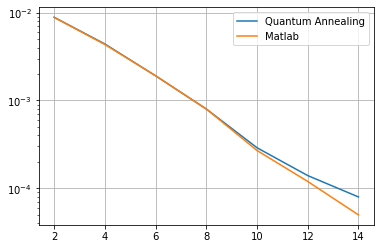

In [31]:
import matplotlib.pyplot as plt
SNR=[2,4,6,8,10,12,14]
plt.semilogy(SNR,er , label='Quantum Annealing')
plt.semilogy(SNR, ber,  label='Matlab')
plt.grid(True)
plt.legend()
plt.show()